In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt



In [9]:
#  NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Texto
texto = """Com a evolução contínua da tecnologia, o processamento de linguagem natural (PLN) tornou-se uma ferramenta essencial na análise de grandes volumes de dados textuais. O PLN permite que máquinas compreendam e interpretem a linguagem humana, facilitando a extração de informações valiosas e a automação de tarefas que antes exigiam intervenção humana. Técnicas avançadas de PLN são utilizadas em diversas aplicações, desde assistentes virtuais até sistemas de recomendação, contribuindo significativamente para a eficiência e a personalização dos serviços oferecidos. À medida que o campo avança, novas metodologias e algoritmos são desenvolvidos para aprimorar a precisão e a eficácia do PLN, tornando-o uma área de estudo fascinante e em constante evolução."""

#Tokenização
tokens = word_tokenize(texto.lower())  # Converte para minúsculas e tokeniza

# Remover pontuação e stopwords
stopwords_pt = set(stopwords.words('portuguese'))
tokens_limpos = [token for token in tokens if token not in stopwords_pt and token not in string.punctuation]

# Lematização
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(token) for token in tokens_limpos]

# tokens
print("Tokens após pré-processamento:")
print(tokens_lematizados)

Tokens após pré-processamento:
['evolução', 'contínua', 'tecnologia', 'processamento', 'linguagem', 'natural', 'pln', 'tornou-se', 'ferramenta', 'essencial', 'análise', 'grandes', 'volume', 'dado', 'textuais', 'pln', 'permite', 'máquinas', 'compreendam', 'interpretem', 'linguagem', 'humana', 'facilitando', 'extração', 'informações', 'valiosas', 'automação', 'tarefas', 'ante', 'exigiam', 'intervenção', 'humana', 'técnicas', 'avançadas', 'pln', 'utilizadas', 'diversas', 'aplicações', 'desde', 'assistentes', 'virtuais', 'sistemas', 'recomendação', 'contribuindo', 'significativamente', 'eficiência', 'personalização', 'serviços', 'oferecidos', 'medida', 'campo', 'avança', 'nova', 'metodologias', 'algoritmos', 'desenvolvidos', 'aprimorar', 'precisão', 'eficácia', 'pln', 'tornando-o', 'área', 'estudo', 'fascinante', 'constante', 'evolução']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Contagem de frequência das palavras-chave
frequencia_palavras = Counter(tokens_lematizados)

# análise das palavras-chave
print("\nFrequência das palavras-chave:")
for palavra, frequencia in frequencia_palavras.most_common():
    print(f"{palavra}: {frequencia}")


Frequência das palavras-chave:
pln: 4
evolução: 2
linguagem: 2
humana: 2
contínua: 1
tecnologia: 1
processamento: 1
natural: 1
tornou-se: 1
ferramenta: 1
essencial: 1
análise: 1
grandes: 1
volume: 1
dado: 1
textuais: 1
permite: 1
máquinas: 1
compreendam: 1
interpretem: 1
facilitando: 1
extração: 1
informações: 1
valiosas: 1
automação: 1
tarefas: 1
ante: 1
exigiam: 1
intervenção: 1
técnicas: 1
avançadas: 1
utilizadas: 1
diversas: 1
aplicações: 1
desde: 1
assistentes: 1
virtuais: 1
sistemas: 1
recomendação: 1
contribuindo: 1
significativamente: 1
eficiência: 1
personalização: 1
serviços: 1
oferecidos: 1
medida: 1
campo: 1
avança: 1
nova: 1
metodologias: 1
algoritmos: 1
desenvolvidos: 1
aprimorar: 1
precisão: 1
eficácia: 1
tornando-o: 1
área: 1
estudo: 1
fascinante: 1
constante: 1


In [11]:
# Treinamento do modelo Word2Vec
modelo_word2vec = Word2Vec(sentences=[tokens_lematizados], vector_size=100, window=5, min_count=1, workers=4)

# Vetor para a palavra "processamento"
vetor_processamento = modelo_word2vec.wv['processamento']
print("\nVetor para a palavra 'processamento':")
print(vetor_processamento)


Vetor para a palavra 'processamento':
[-6.9636069e-03 -2.4585116e-03 -8.0229370e-03  7.5005279e-03
  6.1274157e-03  5.2584694e-03  8.3778575e-03 -6.9653272e-04
 -9.3127284e-03  9.1156662e-03 -4.9285362e-03  7.8479899e-03
  5.5338596e-03 -1.0790766e-03 -7.6642158e-03 -1.4598024e-03
  6.2535368e-03 -6.9660828e-03  1.4420962e-03 -7.9518585e-03
  8.7213479e-03 -2.8557885e-03  9.4373021e-03 -5.7080747e-03
 -9.7177243e-03 -8.6279036e-03 -4.0748348e-03  4.7095944e-03
 -2.4193883e-04  9.2235124e-03  3.1092144e-03  3.7477673e-03
  2.9963492e-03  8.1486488e-03 -2.3967146e-03  7.4073388e-03
 -9.5367134e-03  2.9210865e-03 -6.8166968e-04  4.5225740e-04
  6.8430100e-03 -2.8419732e-03 -2.3567795e-03 -1.0047674e-04
 -4.9769162e-04 -3.5749613e-03  6.2444829e-03 -6.5586674e-03
  7.8919996e-03 -9.3460083e-05  2.6088404e-03  3.2231498e-03
 -2.8165340e-04  1.7063022e-03 -3.1406546e-03  4.7564553e-03
  2.4301052e-04 -3.2805956e-03 -8.7145744e-03 -9.9980794e-03
  3.1277776e-04 -5.7468102e-03 -1.1096597e-03 

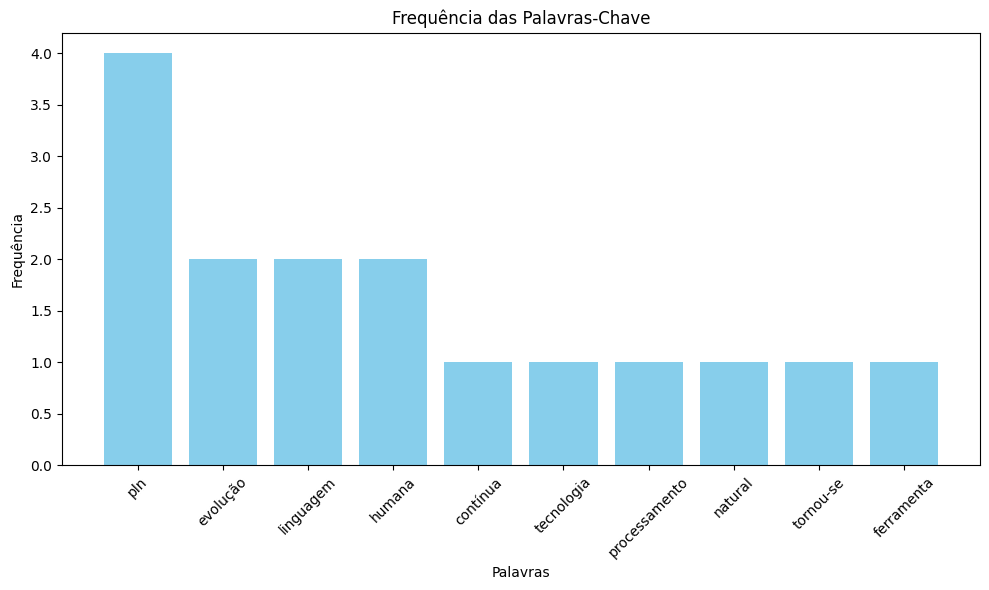

In [12]:
# Criação do gráfico
palavras, frequencias = zip(*frequencia_palavras.most_common(10))  # Top 10 palavras
plt.figure(figsize=(10, 6))
plt.bar(palavras, frequencias, color='skyblue')
plt.title("Frequência das Palavras-Chave")
plt.xlabel("Palavras")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()

# Exibição do gráfico
plt.show()